# 5.2 一个简单的线性回归

# 5.2.1 回归的基本步骤
下面看一个简单的线性回归程序。它的代码在statsmodels官网上：http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html （顺便说一句，官网上经常提供有价值）。

此例中，首先对样本X由一个线性函数产生Y，然后使用线性回归方法估计这个线性函数。手工产生X和y的数据样本：

In [1]:
import statsmodels.api as sm #导入统计模型的API（应用编程接口）
import numpy as np

nobs = 1000 #样本大小
X = np.random.random((nobs, 2)) #nobs行2列的[0, 1)的随机数，这两列分别是x1、x2的数据，行是各个样本点。
X = sm.add_constant(X) #最左边增加全1的一列
beta = [1, .1, .5] #beta[0]、beta[1]、beta[2]分别是常数项、x1和x2的系数
e = np.random.random(nobs) #产生误差项：[0, 1)的随机数
y = np.dot(X, beta) + e #可去试验这三行代码，了解dot的用法：A= np.array([[1, 2], [3, 4]]); beta = [1, 1]; np.dot(A, beta)

In [2]:
print('X:', X)
print('y:', y)

X: [[1.         0.46365409 0.5541733 ]
 [1.         0.14381617 0.6978584 ]
 [1.         0.80152117 0.73983945]
 ...
 [1.         0.63229723 0.50785547]
 [1.         0.06442426 0.51434323]
 [1.         0.20068535 0.02465635]]
y: [1.33403293 1.49283879 1.60314847 1.79145167 1.22304805 2.20207436
 1.1178661  2.29579604 1.95102739 1.3759785  1.94252899 2.02288698
 1.68763543 1.69567962 1.31944594 2.085389   2.1740094  2.34153047
 2.14268761 1.5927586  2.14103731 2.07221449 1.62162876 1.9259911
 2.01212629 2.02480818 1.50306586 2.11660679 1.85826581 1.71112785
 2.04578501 1.78575283 2.09117032 1.49381145 1.56745114 1.80436087
 1.5894397  1.54471257 1.57340668 1.31137652 2.06557782 2.02955569
 2.0868666  2.28819173 2.21172938 2.09058833 2.0150189  2.28167746
 2.03630496 1.79565988 1.26573376 2.29377012 1.73932612 1.8671188
 1.71475899 2.18837934 2.17440819 1.5211537  1.56307538 1.47286301
 1.68901997 1.35850276 1.87063467 1.58555451 1.93204312 2.24391481
 1.78625285 1.16773421 2.06690737 1.4

In [10]:
#线性拟合很简单，就一句话
results = sm.OLS(y, X).fit() #调用线性拟合，注意先y后X

In [4]:
#打印结果
print(results.summary(), '\n') 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     133.5
Date:                Thu, 05 Dec 2019   Prob (F-statistic):           4.24e-52
Time:                        10:48:44   Log-Likelihood:                -171.47
No. Observations:                1000   AIC:                             348.9
Df Residuals:                     997   BIC:                             363.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5254      0.024     64.096      0.0

这里显示。

In [5]:
print('Parameters: ', results.params, '\n')#回归系数
print('R2: ', results.rsquared)#R方叫做拟合优度，介于0到1之间，值越大表明原始样本越贴近这条回归曲线

Parameters:  [1.52541359 0.05905273 0.50902416] 

R2:  0.21123967977139058


由summary或Parameters，常数项、x1和x2的系数分别是[1.50521942 0.09468661 0.49223292]。对比原值beta = [1, .1, .5]，为什么常数项的系数为1.5左右,这与原值1对不上啊！

（原因是误差项e的均值是0.5，加到了常数项上）

In [6]:
print('该回归模型对给定X产生y的预测值：', results.predict(), '\n')

该回归模型对给定X产生y的预测值： [1.83488123 1.88913311 1.94934176 1.7019553  1.70656612 2.04542416
 1.5906127  1.93362773 1.96141272 1.78813261 2.00975729 1.8296999
 2.00569652 1.84464319 1.67881193 1.69048116 1.74352552 2.08334868
 1.83964009 1.96489983 1.92181367 1.98030071 1.63103621 1.66529933
 1.85083819 1.74074463 1.58822488 1.62148042 1.57853962 1.68299986
 1.76166555 1.65556713 1.64105375 1.88464424 1.75892703 1.59473874
 2.03848036 1.98206977 1.67150815 1.58142502 2.052985   1.91449043
 1.64524035 1.80704326 2.01125695 1.62338582 2.01756657 2.01190368
 1.61487605 1.7193864  1.67884287 1.98241043 1.59605137 2.01466118
 1.89252539 1.95787757 2.06855304 1.67268268 1.84142292 1.62665477
 1.91367179 1.74855981 2.02783844 1.95045556 1.59945434 2.02361369
 1.58168221 1.60071995 2.01777236 1.84532107 1.59936634 1.57822943
 1.8483484  1.92191509 2.04520979 1.59639132 1.69126366 1.7364833
 1.87287945 1.61920783 1.91984219 1.96273533 1.69207554 1.87120725
 1.69745632 2.02846755 1.94295359 1.74637942 2

# 5.2.2 画图

这节我们将用matplotlib库在一张图上画出原始样本和回归直线，这是三维数据点与线。我
们可以导入 Matplotlib 自带的 mplot3d 工具箱来画三维图。

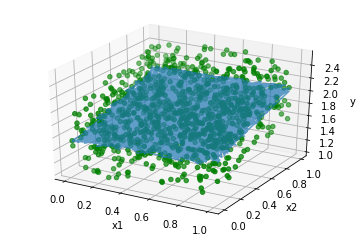

In [7]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,1], X[:,2], y, c='green')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.plot3D(X[:,1], X[:,2], results.predict(), alpha=0.7)
plt.show()